In [1]:
import csv
import matplotlib.pyplot as plt
fst_presidential_debate  = "us_election_2020_1st_presidential_debate.csv"
snd_presidential_debate  = "us_election_2020_2nd_presidential_debate.csv"
biden_town_hall          = "us_election_2020_biden_town_hall.csv"
trump_town_hall          = "us_election_2020_trump_town_hall.csv"
vice_presidential_debate = "us_election_2020_vice_presidential_debate.csv"

In [2]:
def calcul_temps(temps_total, temps_deb, temps_fin):
    parties_temps_deb = temps_deb.split(":")
    if len(parties_temps_deb) == 2:
        heures_deb, minutes_deb, secondes_deb = 0, int(parties_temps_deb[0]), int(parties_temps_deb[1])
    else:
        heures_deb, minutes_deb, secondes_deb = int(parties_temps_deb[0]), int(parties_temps_deb[1]), int(parties_temps_deb[2])

    parties_temps_fin = temps_fin.split(":")
    if len(parties_temps_fin) == 2:
        heures_fin, minutes_fin, secondes_fin = 0, int(parties_temps_fin[0]), int(parties_temps_fin[1])
    else:
        heures_fin, minutes_fin, secondes_fin = int(parties_temps_fin[0]), int(parties_temps_fin[1]), int(parties_temps_fin[2])

    heures = heures_fin - heures_deb
    minutes = minutes_fin - minutes_deb 
    secondes = secondes_fin - secondes_deb

    if secondes < 0:
        secondes += 60
        minutes -= 1
    if minutes < 0:
        minutes += 60
        heures -= 1

    heures_total, minutes_total, secondes_total = temps_total
    secondes_total += secondes
    minutes_total += minutes
    heures_total += heures

    while secondes_total >= 60:
        secondes_total -= 60
        minutes_total += 1
    while minutes_total >= 60:
        minutes_total -= 60
        heures_total += 1

    return heures_total, minutes_total, secondes_total


global_speakers = {}



In [3]:
# Ouvrir le fichier CSV en mode lecture avec l'encodage UTF-8
global_speakers = {}

with open(biden_town_hall, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)

     # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)

    # Ignorer la première ligne (en-tête)
    lignes = lignes[1:]
    err=0
    
    # Parcourir les lignes
    for i in range(len(lignes)):  # Limiter à 10 lignes pour l'exemple
        if err!=0:
            err=err-1
        else:
            ligne=lignes[i]
            speaker = ligne[0]
            if speaker == "Joe Biden":
                speaker = "Vice President Joe Biden"
            temps_debut = ligne[1]
    
            try:
                ligne_suivante = lignes[i+1]
                temps_fin = ligne_suivante[1]
            except IndexError:
                # Si nous atteignons la fin du fichier, utiliser "NA" pour le temps de fin
                temps_fin = "fin"
            if temps_fin == "fin":
                # Si le temps de fin est manquant, passer à la ligne suivante
                break
            if temps_fin == "NA":
                err=2
            else:
                if speaker not in global_speakers:
                    # Calculer le temps de parole pour le speaker actuel
                    temps_parole = calcul_temps((0, 0, 0), temps_debut, temps_fin)
                    global_speakers[speaker] = (temps_parole, 1)
                else:
                    temps_total, nombre_interventions = global_speakers[speaker]
                    temps_total = calcul_temps(temps_total, temps_debut, temps_fin)
                    global_speakers[speaker] = (temps_total, nombre_interventions + 1)

# Identifier les speakers qui ont parlé moins de 2 minutes
speakers_inf_2_minutes = [speaker for speaker, (temps_parole, _) in global_speakers.items() if temps_parole[1] < 2]

if speakers_inf_2_minutes:
    temps_total_biden_audience = [0, 0, 0]
    nombre_interventions_biden_audience = 0
    
    # Rassembler les orateurs sous 'Biden audience'
    for speaker in speakers_inf_2_minutes:
        temps_total_biden_audience[0] += global_speakers[speaker][0][0]
        temps_total_biden_audience[1] += global_speakers[speaker][0][1]
        temps_total_biden_audience[2] += global_speakers[speaker][0][2]
        nombre_interventions_biden_audience += global_speakers[speaker][1]
        del global_speakers[speaker]
    
    while temps_total_biden_audience[2] >= 60:
        temps_total_biden_audience[2] -= 60
        temps_total_biden_audience[1] += 1
    while temps_total_biden_audience[1] >= 60:
        temps_total_biden_audience[1] -= 60
        temps_total_biden_audience[0] += 1
    
    temps_total_biden_audience = tuple(temps_total_biden_audience)
    global_speakers['Biden audience'] = (temps_total_biden_audience, nombre_interventions_biden_audience)

with open(fst_presidential_debate, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)

    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)

    # Ignorer la première ligne (en-tête)
    lignes = lignes[1:]
    err=0

    # Parcourir les lignes
    for i in range(len(lignes)):  # Limiter à 10 lignes pour l'exemple
        if err!=0:
            err=err-1
        else:
            ligne=lignes[i]
            speaker = ligne[0]
            temps_debut = ligne[1]
    
            try:
                ligne_suivante = lignes[i+1]
                temps_fin = ligne_suivante[1]
            except IndexError:
                # Si nous atteignons la fin du fichier, utiliser "NA" pour le temps de fin
                temps_fin = "fin"
            if temps_fin == "fin":
                # Si le temps de fin est manquant, passer à la ligne suivante
                break
            if temps_fin == "NA":
                err=2
            else:
                if speaker not in global_speakers:
                    # Calculer le temps de parole pour le speaker actuel
                    temps_parole = calcul_temps((0, 0, 0), temps_debut, temps_fin)
                    global_speakers[speaker] = (temps_parole, 1)
                else:
                    temps_total, nombre_interventions = global_speakers[speaker]
                    temps_total = calcul_temps(temps_total, temps_debut, temps_fin)
                    global_speakers[speaker] = (temps_total, nombre_interventions + 1)


with open(snd_presidential_debate, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)

    # Ignorer la première ligne (en-tête)
    lignes = lignes[1:]
    err=0

    # Parcourir les lignes
    for i in range(len(lignes)):  # Limiter à 10 lignes pour l'exemple
        if err!=0:
            err=err-1
        else:
            ligne=lignes[i]
            speaker = ligne[0]
            if speaker == "Joe Biden":
                speaker = "Vice President Joe Biden"
            if speaker == "Donald Trump":
                speaker = "President Donald J. Trump"
            temps_debut = ligne[1]
    
            try:
                ligne_suivante = lignes[i+1]
                temps_fin = ligne_suivante[1]
            except IndexError:
                # Si nous atteignons la fin du fichier, utiliser "NA" pour le temps de fin
                temps_fin = "fin"
            if temps_fin == "fin":
                # Si le temps de fin est manquant, passer à la ligne suivante
                break
            if temps_fin == "NA":
                err=2
            else:
                if temps_fin[0]<temps_debut[0]:
                    err=1
                else:
                    if  temps_fin[0]==temps_debut[0] and temps_fin[1]<temps_debut[1]:
                        err=1
                    else:
                        if temps_fin[0]==temps_debut[0] and temps_fin[1]==temps_debut[1] and temps_fin[2]<temps_debut[2]:
                            err=1
              
                if err==0:
                    if speaker not in global_speakers:
                        # Calculer le temps de parole pour le speaker actuel
                        temps_parole = calcul_temps((0, 0, 0), temps_debut, temps_fin)
                        global_speakers[speaker] = (temps_parole, 1)
                    else:
                        temps_total, nombre_interventions = global_speakers[speaker]
                        temps_total = calcul_temps(temps_total, temps_debut, temps_fin)
                        global_speakers[speaker] = (temps_total, nombre_interventions + 1)



with open(trump_town_hall, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)

    # Ignorer la première ligne (en-tête)
    lignes = lignes[1:]
    err=0

    # Parcourir les lignes
    for i in range(len(lignes)):  # Limiter à 10 lignes pour l'exemple
        if err!=0:
            err=err-1
        else:
            ligne=lignes[i]
            speaker = ligne[0]
            if speaker == "President Trump":
                speaker = "President Donald J. Trump"
            if speaker == "Savannah":
                speaker = "Savannah Guthrie"
            temps_debut = ligne[1]

            try:
                ligne_suivante = lignes[i+1]
                temps_fin = ligne_suivante[1]
            except IndexError:
                # Si nous atteignons la fin du fichier, utiliser "NA" pour le temps de fin
                temps_fin = "fin"
            if temps_fin == "fin":
                # Si le temps de fin est manquant, passer à la ligne suivante
                break
            if temps_fin == "NA":
                err=2

            if err==0:
                if speaker not in global_speakers:
                    # Calculer le temps de parole pour le speaker actuel
                    temps_parole = calcul_temps((0, 0, 0), temps_debut, temps_fin)
                    global_speakers[speaker] = (temps_parole, 1)
                else:
                    temps_total, nombre_interventions = global_speakers[speaker]
                    temps_total = calcul_temps(temps_total, temps_debut, temps_fin)
                    global_speakers[speaker] = (temps_total, nombre_interventions + 1)


# Identifier les speakers qui ont parlé moins de 2 minutes
speakers_inf_2_minutes = [speaker for speaker, (temps_parole, _) in global_speakers.items() if temps_parole[1] < 2]

if speakers_inf_2_minutes:
    temps_total_biden_audience = [0, 0, 0]
    nombre_interventions_biden_audience = 0
    
    # Rassembler les orateurs sous 'Biden audience'
    for speaker in speakers_inf_2_minutes:
        temps_total_biden_audience[0] += global_speakers[speaker][0][0]
        temps_total_biden_audience[1] += global_speakers[speaker][0][1]
        temps_total_biden_audience[2] += global_speakers[speaker][0][2]
        nombre_interventions_biden_audience += global_speakers[speaker][1]
        del global_speakers[speaker]
    
    while temps_total_biden_audience[2] >= 60:
        temps_total_biden_audience[2] -= 60
        temps_total_biden_audience[1] += 1
    while temps_total_biden_audience[1] >= 60:
        temps_total_biden_audience[1] -= 60
        temps_total_biden_audience[0] += 1
    
    temps_total_biden_audience = tuple(temps_total_biden_audience)
    global_speakers['Trump audience'] = (temps_total_biden_audience, nombre_interventions_biden_audience)


with open(vice_presidential_debate, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)

    # Ignorer la première ligne (en-tête)
    lignes = lignes[1:]
    err=0

    # Parcourir les lignes
    for i in range(len(lignes)):  # Limiter à 10 lignes pour l'exemple
        if err!=0:
            err=err-1
        else:
            ligne=lignes[i]
            speaker = ligne[0]
            if speaker == "Kamala Harris ":
                speaker = "Kamala Harris"
            temps_debut = ligne[1]

            try:
                ligne_suivante = lignes[i+1]
                temps_fin = ligne_suivante[1]
            except IndexError:
                # Si nous atteignons la fin du fichier, utiliser "NA" pour le temps de fin
                temps_fin = "fin"
            if temps_fin == "fin":
                # Si le temps de fin est manquant, passer à la ligne suivante
                break
            if temps_fin == "NA":
                err=2

            else:
                if temps_fin[0]<temps_debut[0]:
                    err=1
                else:
                    if  temps_fin[0]==temps_debut[0] and temps_fin[1]<temps_debut[1]:
                        err=1
                    else:
                        if temps_fin[0]==temps_debut[0] and temps_fin[1]==temps_debut[1] and temps_fin[2]<temps_debut[2]:
                            err=1
              
                if err==0:
                    if speaker not in global_speakers:
                        # Calculer le temps de parole pour le speaker actuel
                        temps_parole = calcul_temps((0, 0, 0), temps_debut, temps_fin)
                        global_speakers[speaker] = (temps_parole, 1)
                    else:
                        temps_total, nombre_interventions = global_speakers[speaker]
                        temps_total = calcul_temps(temps_total, temps_debut, temps_fin)
                        global_speakers[speaker] = (temps_total, nombre_interventions + 1)



# Afficher le résultat
for speaker, (temps_parole, nombre_interventions) in global_speakers.items():
    print("Temps de parole pour", speaker, ":", "{:02d}:{:02d}:{:02d}".format(*temps_parole), "pour", nombre_interventions, "intervention(s).")


Temps de parole pour George Stephanopoulos : 00:18:19 pour 60 intervention(s).
Temps de parole pour Vice President Joe Biden : 02:09:13 pour 504 intervention(s).
Temps de parole pour Voice Over : 00:04:22 pour 2 intervention(s).
Temps de parole pour Speaker 2 : 00:04:53 pour 1 intervention(s).
Temps de parole pour Biden audience : 00:06:30 pour 33 intervention(s).
Temps de parole pour Chris Wallace : 00:24:15 pour 224 intervention(s).
Temps de parole pour President Donald J. Trump : 01:52:24 pour 702 intervention(s).
Temps de parole pour Kristen Welker : 00:22:15 pour 189 intervention(s).
Temps de parole pour Savannah Guthrie : 00:15:06 pour 173 intervention(s).
Temps de parole pour Trump audience : 00:04:48 pour 29 intervention(s).
Temps de parole pour Susan Page : 00:16:36 pour 117 intervention(s).
Temps de parole pour Kamala Harris : 00:35:44 pour 94 intervention(s).
Temps de parole pour Mike Pence : 00:34:44 pour 113 intervention(s).


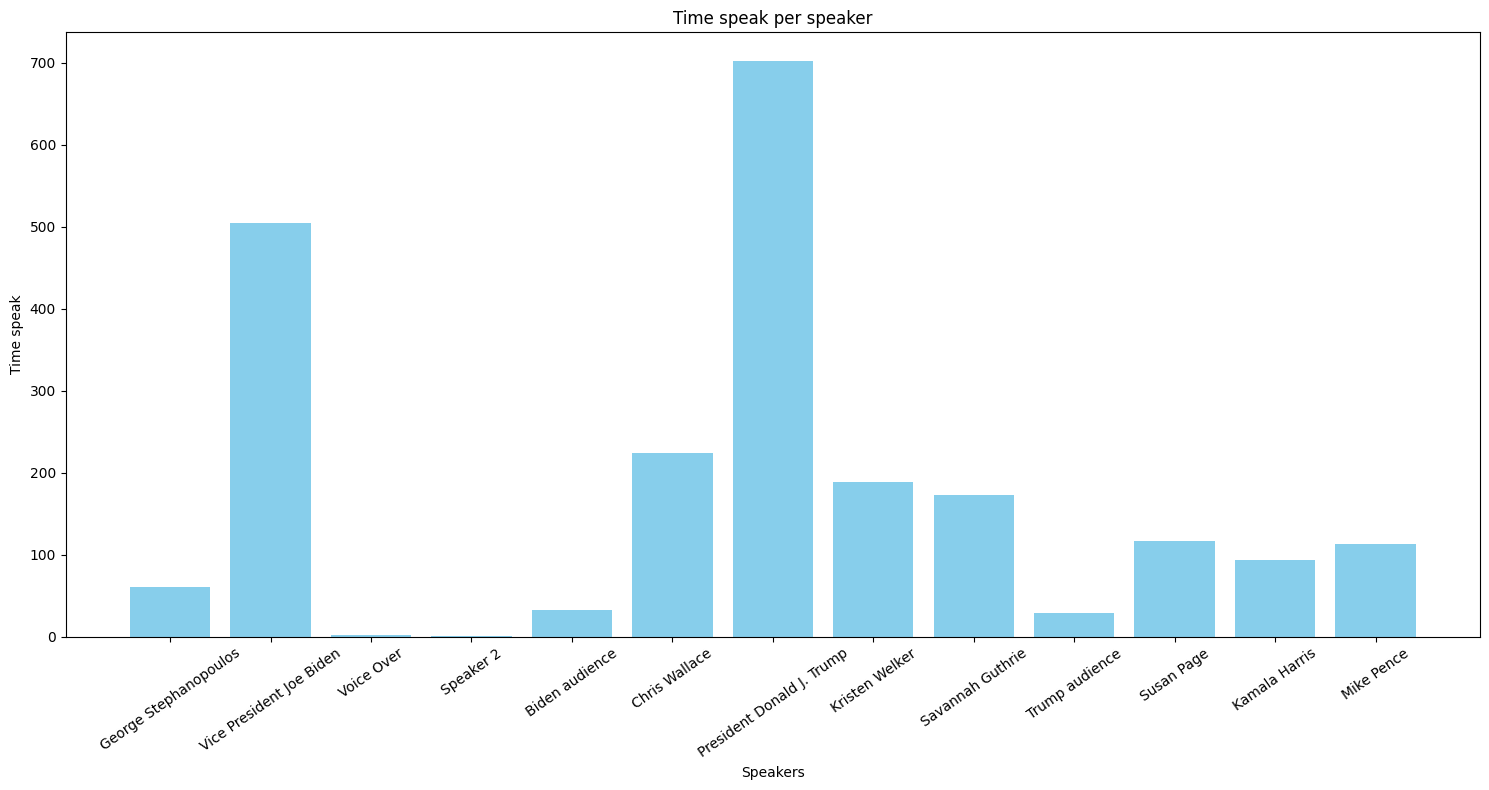

In [6]:
# Fonction pour créer un histogramme des interventions des speakers
def create_histogram(data):
    speakers = list(data.keys())
    interventions = list(data.values())

    plt.figure(figsize=(15, 8))  # Taille de la figure
    plt.bar(range(len(speakers)), interventions, color='skyblue')  # Création de l'histogramme

    plt.xlabel('Speakers')  # Label de l'axe x
    plt.ylabel('Time speak')  # Label de l'axe y
    plt.title('Time speak per speaker')  # Titre du graphe

    plt.xticks(range(len(speakers)), speakers, rotation=35)  # Spécifie les positions et les étiquettes des marqueurs sur l'axe x
    plt.tight_layout()  # Ajuste le layout pour éviter le chevauchement des labels
    plt.savefig('histogramme_interventions.png')  # Sauvegarde du graphe sous forme de fichier image
    plt.show()  # Affiche le graphe

data = {speaker: interventions for speaker, (temps, interventions) in global_speakers.items()}

# Appel de la fonction avec les données
create_histogram(data)

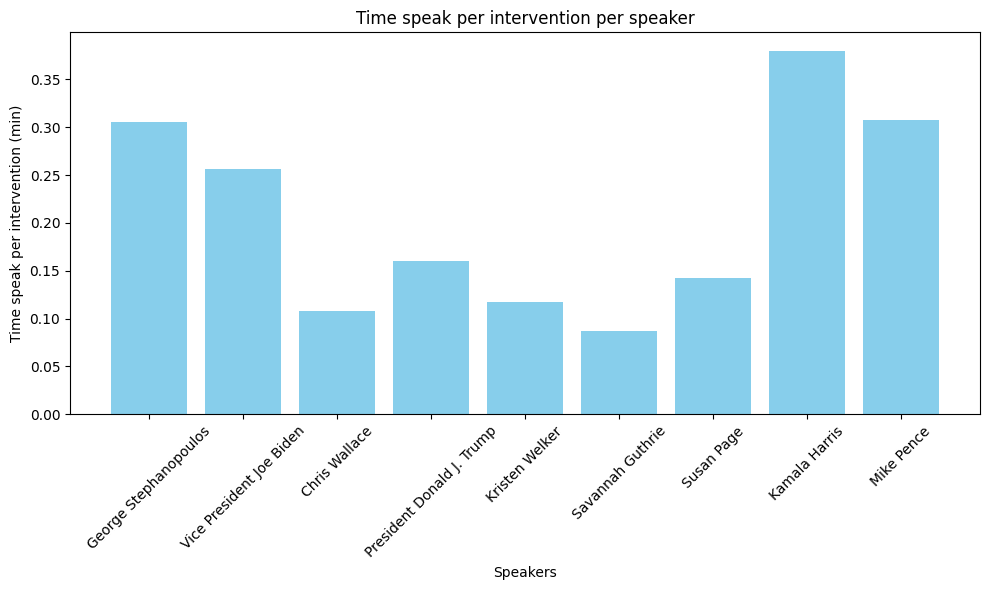

In [7]:
# Fonction pour convertir le temps de parole en secondes
def convert_to_seconds(time_tuple):
    hours, minutes, seconds = time_tuple
    return hours * 3600 + minutes * 60 + seconds

# Fonction pour créer un graphique représentant le temps de parole par intervention pour chaque locuteur
def create_time_per_intervention_graph(data):
    speakers = list(data.keys())
    time_per_intervention = [convert_to_seconds(temps) / interventions for temps, interventions in data.values()]

    # Convertir le temps de parole par intervention en minutes
    time_per_intervention_minutes = [time / 60 for time in time_per_intervention]

    plt.figure(figsize=(10, 6))  # Taille de la figure
    plt.bar(range(len(speakers)), time_per_intervention_minutes, color='skyblue')  # Création du graphique en barres

    plt.xlabel('Speakers')  # Label de l'axe x
    plt.ylabel('Time speak per intervention (min)')  # Label de l'axe y
    plt.title('Time speak per intervention per speaker')  # Titre du graphe

    plt.xticks(range(len(speakers)), speakers, rotation=45)  # Spécifie les positions et les étiquettes des marqueurs sur l'axe x
    plt.tight_layout()  # Ajuste le layout pour éviter le chevauchement des labels
    plt.savefig('time_per_intervention.png')  # Sauvegarde du graphe sous forme de fichier image
    plt.show()  # Affiche le graphe

# Filtrer les données pour ne garder que Joe Biden et Donald Trump
#filtered_speakers = {speaker: data for speaker, data in global_speakers.items() if speaker in ['Vice President Joe Biden', 'President Donald J. Trump']}
# Filtrer les données pour ne garder que les locuteurs ayant plus de 100 interventions
filtered_speakers = {speaker: data for speaker, data in global_speakers.items() if data[1] > 50}



# Appel de la fonction avec les données filtrées
create_time_per_intervention_graph(filtered_speakers)

In [8]:
full_feature_extraction_dataset = "full_feature_extraction_dataset.csv"

global_debates = {}

with open(full_feature_extraction_dataset, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)

    # Ignorer la première ligne (en-tête)
    lignes = lignes[1:]
    
    last_debate = None
    # Parcourir les lignes
    for i in range(len(lignes)): 
        ligne = lignes[i]
        speaker = ligne[2]
        debate = ligne[5]
        
        if debate not in global_debates:
            speakers = [speaker]
            nombre_echange = 1
            fois_aborde = 1
            global_debates[debate] = (speakers, nombre_echange, fois_aborde)
        else:
            speakers, nombre_echange, fois_aborde = global_debates[debate]
            ligne_precedente = lignes[i-1]
            speaker_precedent = ligne_precedente[2]
            debate_precedent = ligne_precedente[5]
            
            if debate_precedent != debate:
                fois_aborde += 1
            
            if speaker_precedent != speaker:
                if speaker not in speakers:
                    speakers.append(speaker)
                nombre_echange += 1

            global_debates[debate] = (speakers, nombre_echange, fois_aborde)
        
        last_debate = debate

# Afficher le résultat
for debate, (speakers, nombre_echange, fois_aborde) in global_debates.items():
    print("Thème du débat :", debate)
    print("    Avec ", nombre_echange, " échanges de parole entre:")
    print(speakers)
    print("    Débat abordé ", fois_aborde, " fois.")
    print("")


Thème du débat : Supreme Court
    Avec  98  échanges de parole entre:
['Chris Wallace', 'Donald Trump', 'Joe Biden', 'Audience Member 6', 'George Stephanopoulos', 'Savannah Guthrie', 'Susan Page', 'Mike Pence', 'Kamala Harris']
    Débat abordé  4  fois.

Thème du débat : Healthcare
    Avec  143  échanges de parole entre:
['Chris Wallace', 'Donald Trump', 'Joe Biden', 'Audience Member 15', 'Savannah Guthrie']
    Débat abordé  2  fois.

Thème du débat : COVID
    Avec  391  échanges de parole entre:
['Chris Wallace', 'Joe Biden', 'Donald Trump', 'Kristen Welker', 'George Stephanopoulos', 'Audience Member 2', 'Audience Member 10', 'Savannah Guthrie', 'Audience Member 12', 'Audience Member 13', 'Audience Member 14', 'Kamala Harris', 'Susan Page', 'Mike Pence']
    Débat abordé  10  fois.

Thème du débat : Economy
    Avec  246  échanges de parole entre:
['Chris Wallace', 'Donald Trump', 'Joe Biden', 'Audience Member 3', 'George Stephanopoulos', 'Audience Member 2', 'Kamala Harris', 'Su

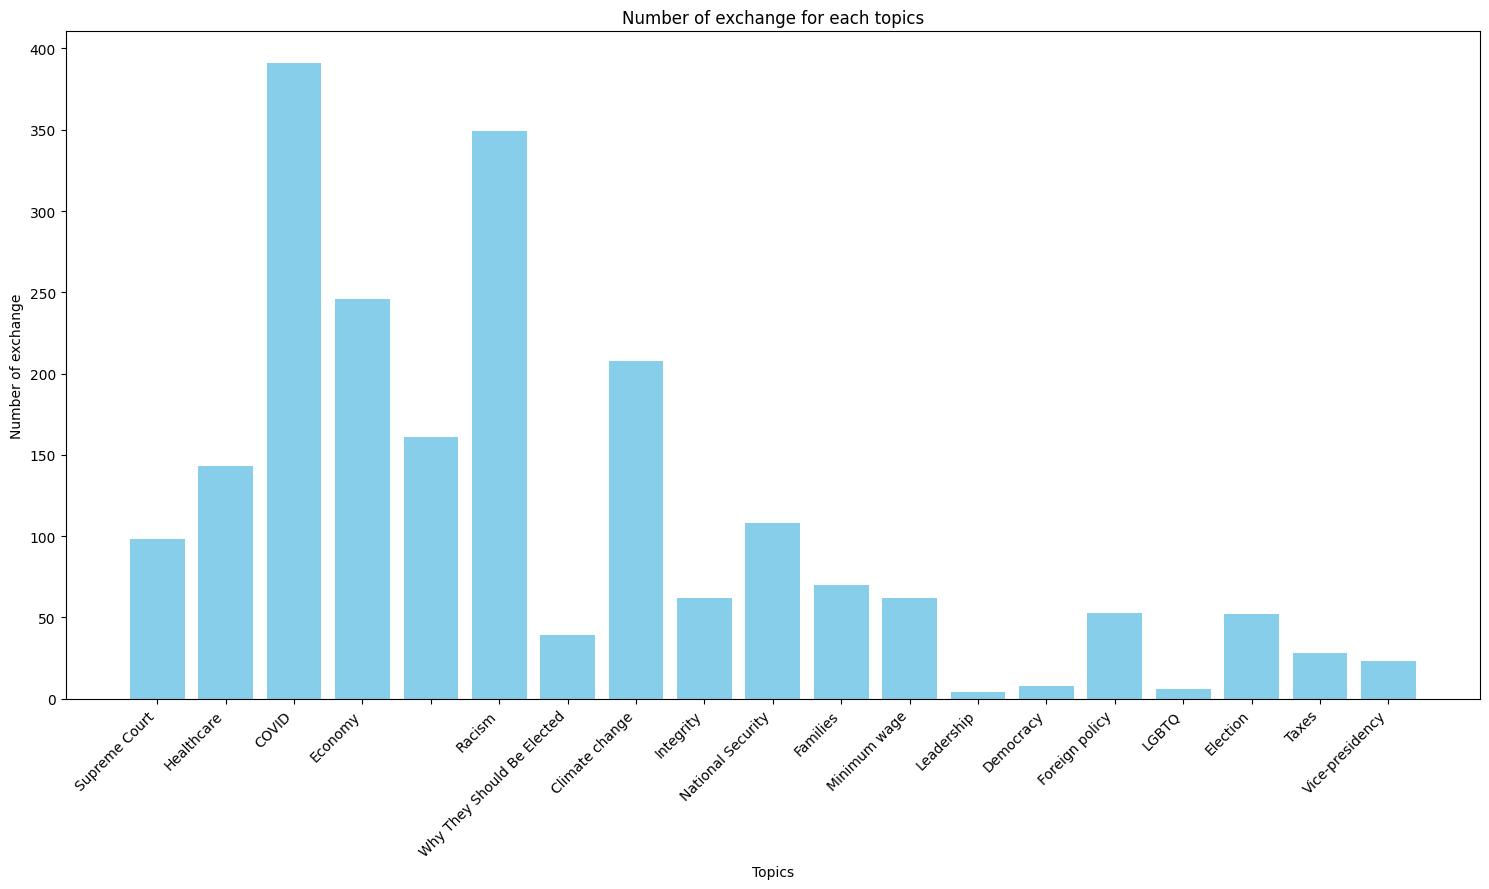

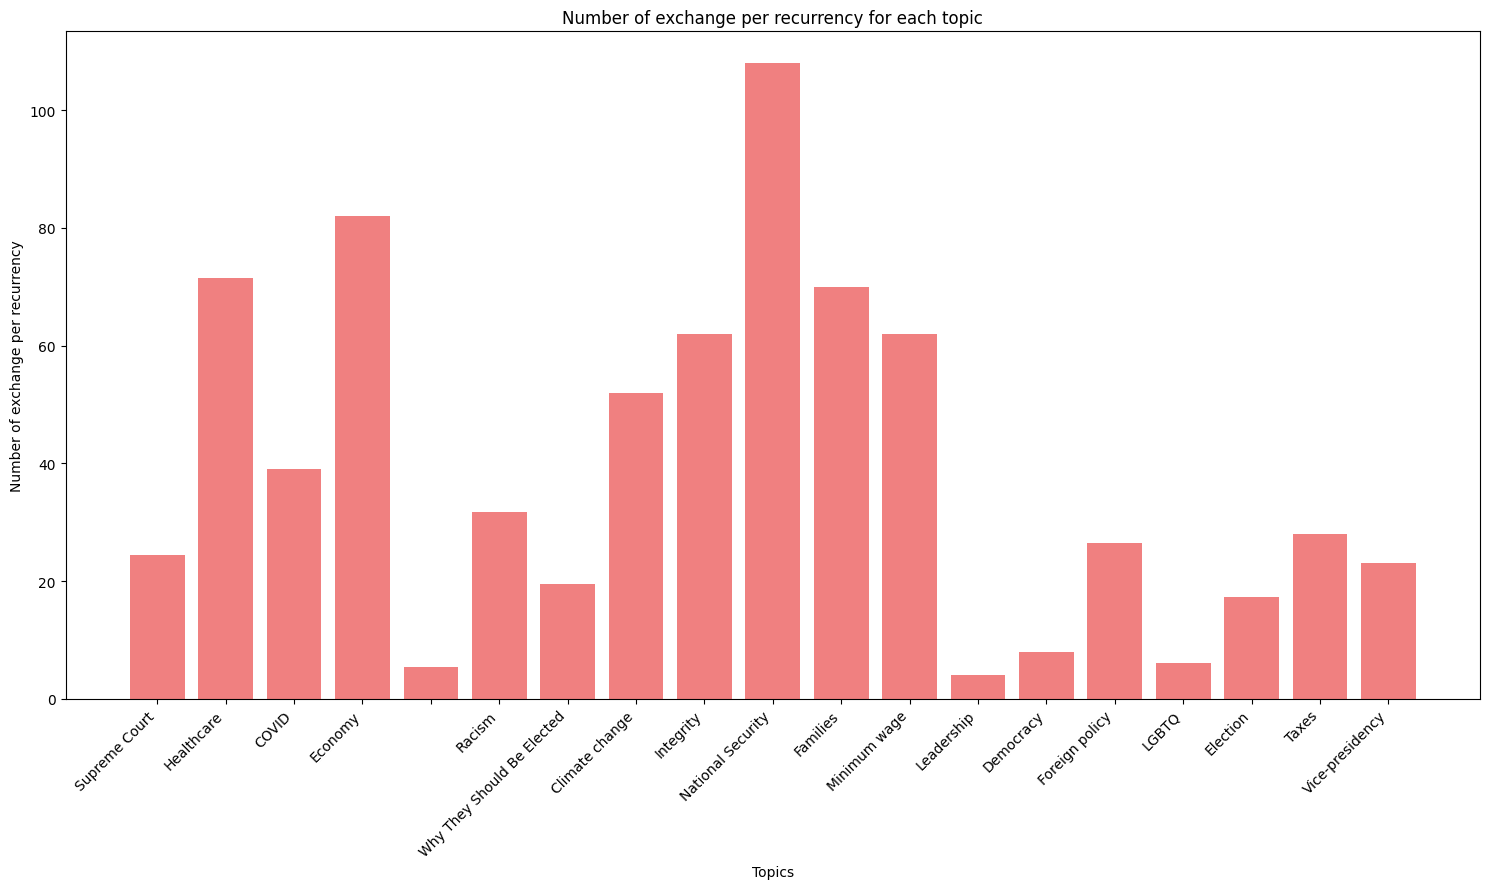

In [10]:
# Fonction pour afficher un histogramme des débats et de leur nombre d'échanges
def afficher_histogramme_nombre_echanges(global_debates):
    debates = list(global_debates.keys())
    nombre_echanges = [global_debates[debate][1] for debate in debates]
    
    plt.figure(figsize=(15, 9))
    plt.bar(debates, nombre_echanges, color='skyblue')
    plt.xlabel('Topics')
    plt.ylabel('Number of exchange')
    plt.title('Number of exchange for each topics')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Fonction pour afficher un histogramme des débats et de leur nombre d'échanges par fois abordé
def afficher_histogramme_nombre_echanges_par_fois_aborde(global_debates):
    debates = list(global_debates.keys())
    nombre_echanges_par_fois = [global_debates[debate][1] / global_debates[debate][2] for debate in debates]
    
    plt.figure(figsize=(15, 9))
    plt.bar(debates, nombre_echanges_par_fois, color='lightcoral')
    plt.xlabel('Topics')
    plt.ylabel('Number of exchange per recurrency')
    plt.title('Number of exchange per recurrency for each topic')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Afficher les résultats
afficher_histogramme_nombre_echanges(global_debates)
afficher_histogramme_nombre_echanges_par_fois_aborde(global_debates)

['_unit_id', '_golden', '_missed', '_tainted', '_trust', '_worker_id', 'confidence', 'relation', 'orig__golden', 'context', 'pair_id', 'relation_gold', 'relation_gold_reason', 'sentence_1', 'sentence_2', 'speaker_1', 'speaker_2', 'topic']

24710



100.0 %
Climate change
Joe Biden : By the way, I have a transition from the old industry, yes.
relation : Attack
V
This is an attack relation. Tump uses the sentence "that's a big statement" as an argument to what Biden said. This argument is meant to attack what Biden said.
V
Donald Trump : Oh, that’s a big statement.

83.33 %
Supreme Court
Mike Pence : I couldn’t be more proud to serve as vice president to a president who stands without apology for the sanctity of human life.
relation : Support
||
This is a support relation. It helps to put it in the following way: "I couldn't be more proud […] [because] I'm pro-life". 
||
Mike Pence : I’m pro-life.


100.0 %
Supreme Court
Donald Trump : And if you were here, it wouldn’t be 200, it would b

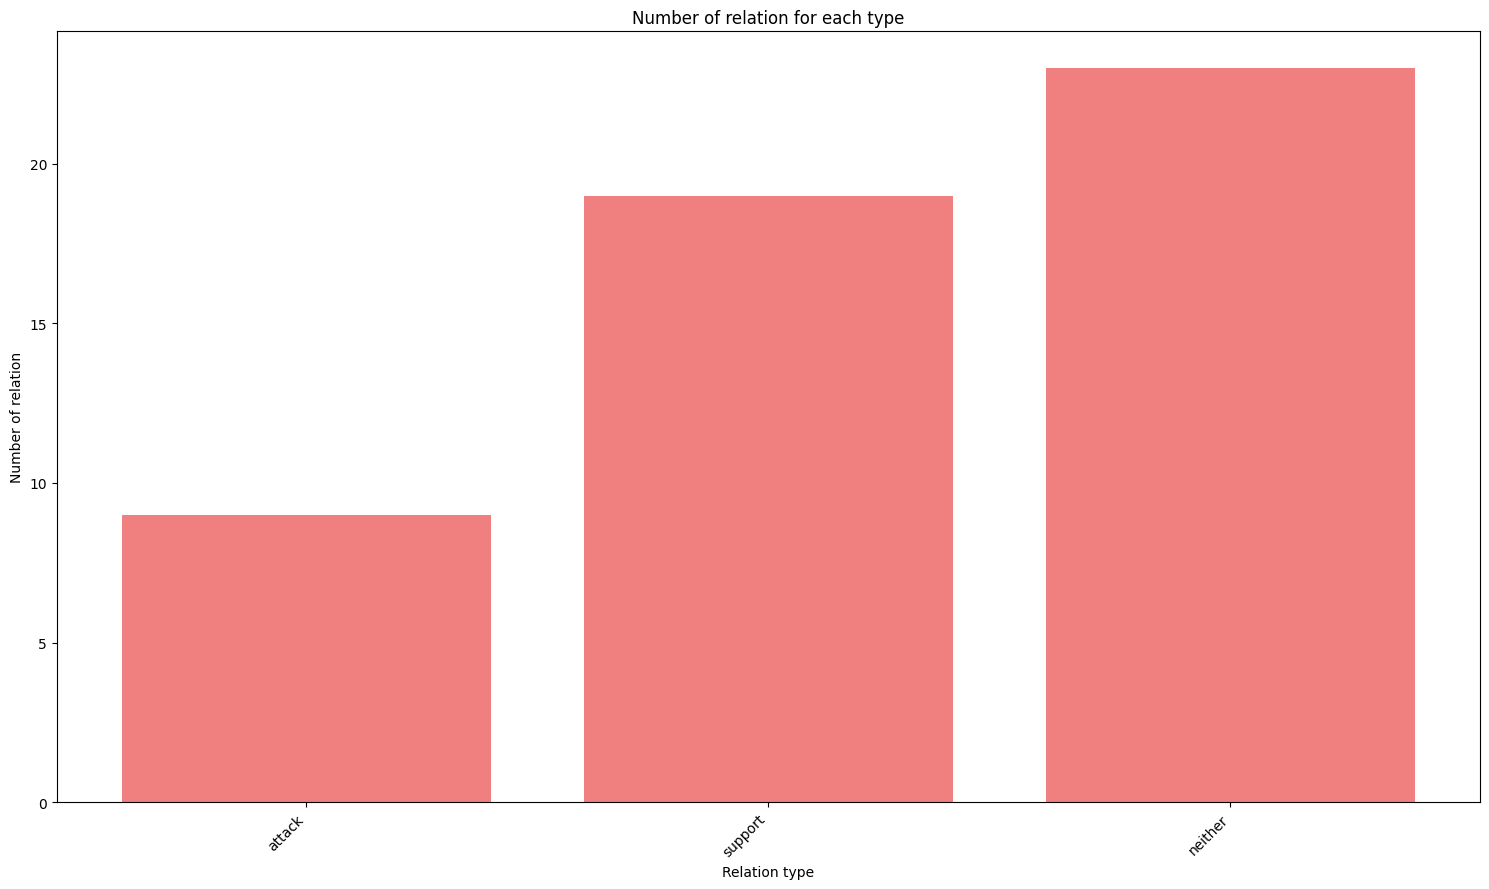

In [13]:
full_dataset = "full_dataset.csv"

global_pair_attack = {}
global_pair_support = {}

def clean_relation(relation):
    # Supprime les espaces blancs en début et fin et remplace les retours à la ligne par des espaces
    cleaned_relation = relation.strip().replace('\n', ' ').replace('\r', ' ')
    if cleaned_relation == '':
        return ''  # Retourne une chaîne vide si la case est vide
    # Sépare les mots et filtre pour garder uniquement les valeurs reconnues
    words = cleaned_relation.split()
    recognized_words = [word.capitalize() for word in words if word.lower() in ['support', 'attack', 'neither']]
    # Si plusieurs termes valides sont présents, donner la priorité à "Support" puis "Attack"
    if 'Support' in recognized_words:
        return 'Support'
    elif 'Attack' in recognized_words:
        return 'Attack'
    elif 'Neither' in recognized_words:
        return 'Neither'
    # Si aucune valeur reconnue, retourner 'Neither' par défaut
    return 'Neither'

with open(full_dataset, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    # Ignorer la première ligne (en-tête)
    print(lignes[0])
    print("")
    lignes = lignes[1:]
    pairs = []
    nb_neither = 0
    nb_attack = 0
    nb_support = 0
    # Parcourir les lignes
    print(len(lignes))
    for i in range(len(lignes)): 
        ligne = lignes[i]

        trust = ligne[4]
        pair_id = ligne[10]
        relation_gold = ligne[11]
        reason = ligne[12]
        sentence_1 = ligne[13]
        sentence_2 = ligne[14]
        speaker_1 = ligne[15]
        speaker_2 = ligne[16]
        topic = ligne[17]

        if float(trust) > 0.8:
            if pair_id not in pairs:
                pairs.append(pair_id)                
                cleaned_relation = clean_relation(relation_gold)
                
                if cleaned_relation == "":
                    continue  # Ignorer les cases vides
                if cleaned_relation == "Neither":
                    nb_neither += 1
                else:
                    print(float(trust) * 100, "%")
                    print(topic)
                    print(speaker_1, ":", sentence_1)
                    print("relation :", cleaned_relation)
                    if cleaned_relation == "Attack":
                        print("V")
                        print(reason)
                        print("V")
                        nb_attack += 1
                    if cleaned_relation == "Support":
                        print("||")
                        print(reason)
                        print("||")
                        nb_support += 1
                    print(speaker_2, ":", sentence_2)
                print("")

print(len(lignes))
print("attack:",nb_attack)
print("support:",nb_support)
print("neither:",nb_neither)
A=["attack","support","neither"]
NB=[nb_attack,nb_support,nb_neither]
plt.figure(figsize=(15, 9))
plt.bar(A, NB, color='lightcoral')
plt.xlabel('Relation type')
plt.ylabel('Number of relation')
plt.title('Number of relation for each type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
with open(full_dataset, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    # Ignorer la première ligne (en-tête)
    for j in range(1,len(lignes)):
        cleaned_relation = clean_relation(lignes[j][11])
        print(cleaned_relation)
        if cleaned_relation == "Attack":
            print("Ligne",j)
            for i in range(18):
                if i!=9:
                    print(lignes[0][i],":",lignes[j][i])
            print("")

Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither
Neither


In [15]:
full_dataset_processing = "full_dataset_processing.csv"

with open(full_dataset, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    
    # Colonnes à extraire
    colonnes = [0, 10, 11, 12, 13, 14, 15, 16, 17]
    for i in range(len(lignes)):
        lignes[i] = [lignes[i][col] for col in colonnes] 
    
    with open(full_dataset_processing, mode='w', newline='', encoding='utf-8') as fichier_csv:
        writer = csv.writer(fichier_csv)
        writer.writerow(lignes[0])

        lignes = lignes[1:]
        i = 1
        while i<len(lignes):
            cleaned_relation = clean_relation(lignes[i][2])
            if cleaned_relation != "":
                if lignes[i][0] != lignes[i-1][0]:
                    lignes[i][2] = cleaned_relation
                    writer.writerow(lignes[i])
            i+=1
        
            
with open(full_dataset_processing, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    nb_att = 0
    nb_nei = 0
    nb_sup = 0
    for j in range(1,len(lignes)):
        print("Ligne",j)
        cleaned_relation = clean_relation(lignes[j][2])
        print(cleaned_relation)
        if cleaned_relation == "Attack":
            nb_att += 1
        if cleaned_relation == "Support":
            nb_sup += 1
        if cleaned_relation == "Neither":
            nb_nei += 1
        for i in range(9):
            print(lignes[0][i],":",lignes[j][i])
        print("")
    print("Attack :", nb_att)
    print("Support :", nb_sup)
    print("Neither :", nb_nei)

Ligne 1
Neither
_unit_id : 3085729586
pair_id : n010145b07p4345
relation_gold : Neither
relation_gold_reason : Here, the speaker is reiterating an opinion, there is no support nor attack relation.
sentence_1 : This is ridiculous.
sentence_2 : Absolutely ridiculous.
speaker_1 : Joe Biden
speaker_2 : Joe Biden
topic : Racism

Ligne 2
Neither
_unit_id : 3085729587
pair_id : n000798b07p9495
relation_gold : Neither
relation_gold_reason : The relation between these sentences is classified as neither because one of them is incomplete and the other one contains transcription labels.
sentence_1 : But let me just tell you-
sentence_2 : In [crosstalk 00:16:04]?
speaker_1 : Donald Trump
speaker_2 : Joe Biden
topic : Economy

Ligne 3
Attack
_unit_id : 3085729588
pair_id : n030538b07p3536
relation_gold : Attack
relation_gold_reason : This is an attack relation. Tump uses the sentence "that's a big statement" as an argument to what Biden said. This argument is meant to attack what Biden said.
sentenc

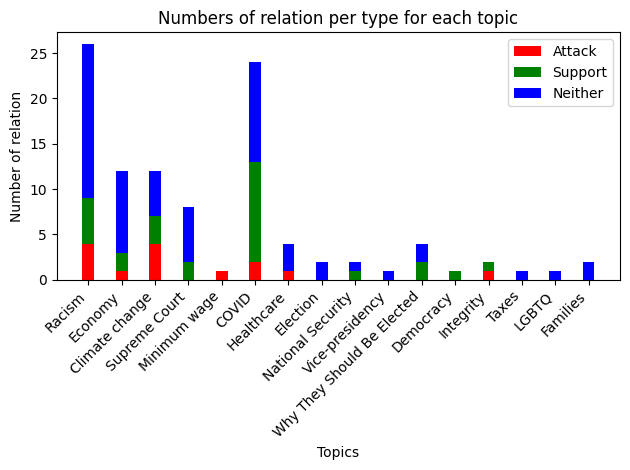

In [17]:
import numpy as np

# Dictionnaire pour stocker les comptes par topic et par type de relation
relations_par_topic = {}

# Lecture du fichier CSV
with open(full_dataset_processing, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    header = next(lecteur_csv)  # Sauter l'en-tête s'il y en a une
    
    for ligne in lecteur_csv:
        relation_type = ligne[2]
        topic = ligne[-1]
        
        if topic not in relations_par_topic:
            relations_par_topic[topic] = {'Attack': 0, 'Support': 0, 'Neither': 0}
        
        if relation_type == 'Attack':
            relations_par_topic[topic]['Attack'] += 1
        elif relation_type == 'Support':
            relations_par_topic[topic]['Support'] += 1
        elif relation_type == 'Neither':
            relations_par_topic[topic]['Neither'] += 1

# Préparation des données pour le graphique
topics = list(relations_par_topic.keys())
Attack = [relations_par_topic[topic]['Attack'] for topic in topics]
Support = [relations_par_topic[topic]['Support'] for topic in topics]
Neither = [relations_par_topic[topic]['Neither'] for topic in topics]

# Configuration de l'histogramme
bar_width = 0.35
index = np.arange(len(topics))

fig, ax = plt.subplots()

bar1 = ax.bar(index, Attack, bar_width, label='Attack', color='red')
bar2 = ax.bar(index, Support, bar_width, bottom=Attack, label='Support', color='green')
bar3 = ax.bar(index, Neither, bar_width, bottom=[i+j for i,j in zip(Attack, Support)], label='Neither', color='blue')

ax.set_xlabel('Topics')
ax.set_ylabel('Number of relation')
ax.set_title('Numbers of relation per type for each topic')
ax.set_xticks(index)
ax.set_xticklabels(topics, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


In [18]:
full_dataset_processing_racism_attack = "relation/full_dataset_processing_racism_attack.csv"

with open(full_dataset_processing, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    with open(full_dataset_processing_racism_attack, mode='w', newline='', encoding='utf-8') as fichier_csv:
        writer = csv.writer(fichier_csv)
        writer.writerow(lignes[0])
        for j in range(1,len(lignes)):
            if lignes[j][8] == "Racism": 
                cleaned_relation = clean_relation(lignes[j][2])
                if cleaned_relation == "Attack":
                    for i in range(9):
                        print(lignes[0][i],":",lignes[j][i])
                    print("")
                    writer.writerow(lignes[j])

full_dataset_processing_racism_support = "relation/full_dataset_processing_racism_support.csv"

with open(full_dataset_processing, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    with open(full_dataset_processing_racism_support, mode='w', newline='', encoding='utf-8') as fichier_csv:
        writer = csv.writer(fichier_csv)
        writer.writerow(lignes[0])
        for j in range(1,len(lignes)):
            if lignes[j][8] == "Racism": 
                cleaned_relation = clean_relation(lignes[j][2])
                if cleaned_relation == "Support":
                    for i in range(9):
                        print(lignes[0][i],":",lignes[j][i])
                    print("")
                    writer.writerow(lignes[j])

full_dataset_processing_economy_attack = "relation/full_dataset_processing_economy_attack.csv"

with open(full_dataset_processing, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    with open(full_dataset_processing_economy_attack, mode='w', newline='', encoding='utf-8') as fichier_csv:
        writer = csv.writer(fichier_csv)
        writer.writerow(lignes[0])
        for j in range(1,len(lignes)):
            if lignes[j][8] == "Economy": 
                cleaned_relation = clean_relation(lignes[j][2])
                if cleaned_relation == "Attack":
                    for i in range(9):
                        print(lignes[0][i],":",lignes[j][i])
                    print("")
                    writer.writerow(lignes[j])

full_dataset_processing_economy_support = "relation/full_dataset_processing_economy_support.csv"

with open(full_dataset_processing, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    with open(full_dataset_processing_economy_support, mode='w', newline='', encoding='utf-8') as fichier_csv:
        writer = csv.writer(fichier_csv)
        writer.writerow(lignes[0])
        for j in range(1,len(lignes)):
            if lignes[j][8] == "Economy": 
                cleaned_relation = clean_relation(lignes[j][2])
                if cleaned_relation == "Support":
                    for i in range(9):
                        print(lignes[0][i],":",lignes[j][i])
                    print("")
                    writer.writerow(lignes[j])

full_dataset_processing_climate_attack = "relation/full_dataset_processing_climate_attack.csv"

with open(full_dataset_processing, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    with open(full_dataset_processing_climate_attack, mode='w', newline='', encoding='utf-8') as fichier_csv:
        writer = csv.writer(fichier_csv)
        writer.writerow(lignes[0])
        for j in range(1,len(lignes)):
            if lignes[j][8] == "Climate change": 
                cleaned_relation = clean_relation(lignes[j][2])
                if cleaned_relation == "Attack":
                    for i in range(9):
                        print(lignes[0][i],":",lignes[j][i])
                    print("")
                    writer.writerow(lignes[j])

full_dataset_processing_climate_support = "relation/full_dataset_processing_climate_support.csv"

with open(full_dataset_processing, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    with open(full_dataset_processing_climate_support, mode='w', newline='', encoding='utf-8') as fichier_csv:
        writer = csv.writer(fichier_csv)
        writer.writerow(lignes[0])
        for j in range(1,len(lignes)):
            if lignes[j][8] == "Climate change": 
                cleaned_relation = clean_relation(lignes[j][2])
                if cleaned_relation == "Support":
                    for i in range(9):
                        print(lignes[0][i],":",lignes[j][i])
                    print("")
                    writer.writerow(lignes[j])

full_dataset_processing_court_support = "relation/full_dataset_processing_court_support.csv"

with open(full_dataset_processing, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    with open(full_dataset_processing_court_support, mode='w', newline='', encoding='utf-8') as fichier_csv:
        writer = csv.writer(fichier_csv)
        writer.writerow(lignes[0])
        for j in range(1,len(lignes)):
            if lignes[j][8] == "Supreme Court": 
                cleaned_relation = clean_relation(lignes[j][2])
                if cleaned_relation == "Support":
                    for i in range(9):
                        print(lignes[0][i],":",lignes[j][i])
                    print("")
                    writer.writerow(lignes[j])

full_dataset_processing_wage_attack = "relation/full_dataset_processing_wage_attack.csv"

with open(full_dataset_processing, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    with open(full_dataset_processing_wage_attack, mode='w', newline='', encoding='utf-8') as fichier_csv:
        writer = csv.writer(fichier_csv)
        writer.writerow(lignes[0])
        for j in range(1,len(lignes)):
            if lignes[j][8] == "Minimum wage": 
                cleaned_relation = clean_relation(lignes[j][2])
                if cleaned_relation == "Attack":
                    for i in range(9):
                        print(lignes[0][i],":",lignes[j][i])
                    print("")
                    writer.writerow(lignes[j])

full_dataset_processing_covid_attack = "relation/full_dataset_processing_covid_attack.csv"

with open(full_dataset_processing, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    with open(full_dataset_processing_covid_attack, mode='w', newline='', encoding='utf-8') as fichier_csv:
        writer = csv.writer(fichier_csv)
        writer.writerow(lignes[0])
        for j in range(1,len(lignes)):
            if lignes[j][8] == "COVID": 
                cleaned_relation = clean_relation(lignes[j][2])
                if cleaned_relation == "Attack":
                    for i in range(9):
                        print(lignes[0][i],":",lignes[j][i])
                    print("")
                    writer.writerow(lignes[j])

full_dataset_processing_covid_support = "relation/full_dataset_processing_covid_support.csv"

with open(full_dataset_processing, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    with open(full_dataset_processing_covid_support, mode='w', newline='', encoding='utf-8') as fichier_csv:
        writer = csv.writer(fichier_csv)
        writer.writerow(lignes[0])
        for j in range(1,len(lignes)):
            if lignes[j][8] == "COVID": 
                cleaned_relation = clean_relation(lignes[j][2])
                if cleaned_relation == "Support":
                    for i in range(9):
                        print(lignes[0][i],":",lignes[j][i])
                    print("")
                    writer.writerow(lignes[j])

full_dataset_processing_healthcare_attack = "relation/full_dataset_processing_healthcare_attack.csv"

with open(full_dataset_processing, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    with open(full_dataset_processing_healthcare_attack, mode='w', newline='', encoding='utf-8') as fichier_csv:
        writer = csv.writer(fichier_csv)
        writer.writerow(lignes[0])
        for j in range(1,len(lignes)):
            if lignes[j][8] == "Healthcare": 
                cleaned_relation = clean_relation(lignes[j][2])
                if cleaned_relation == "Attack":
                    for i in range(9):
                        print(lignes[0][i],":",lignes[j][i])
                    print("")
                    writer.writerow(lignes[j])

full_dataset_processing_security_support = "relation/full_dataset_processing_security_support.csv"

with open(full_dataset_processing, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    with open(full_dataset_processing_security_support, mode='w', newline='', encoding='utf-8') as fichier_csv:
        writer = csv.writer(fichier_csv)
        writer.writerow(lignes[0])
        for j in range(1,len(lignes)):
            if lignes[j][8] == "National Security": 
                cleaned_relation = clean_relation(lignes[j][2])
                if cleaned_relation == "Support":
                    for i in range(9):
                        print(lignes[0][i],":",lignes[j][i])
                    print("")
                    writer.writerow(lignes[j])

full_dataset_processing_elected_support = "relation/full_dataset_processing_elected_support.csv"

with open(full_dataset_processing, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    with open(full_dataset_processing_elected_support, mode='w', newline='', encoding='utf-8') as fichier_csv:
        writer = csv.writer(fichier_csv)
        writer.writerow(lignes[0])
        for j in range(1,len(lignes)):
            if lignes[j][8] == "Why They Should Be Elected": 
                cleaned_relation = clean_relation(lignes[j][2])
                if cleaned_relation == "Support":
                    for i in range(9):
                        print(lignes[0][i],":",lignes[j][i])
                    print("")
                    writer.writerow(lignes[j])

full_dataset_processing_democracy_support = "relation/full_dataset_processing_democracy_support.csv"

with open(full_dataset_processing, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    with open(full_dataset_processing_democracy_support, mode='w', newline='', encoding='utf-8') as fichier_csv:
        writer = csv.writer(fichier_csv)
        writer.writerow(lignes[0])
        for j in range(1,len(lignes)):
            if lignes[j][8] == "Democracy": 
                cleaned_relation = clean_relation(lignes[j][2])
                if cleaned_relation == "Support":
                    for i in range(9):
                        print(lignes[0][i],":",lignes[j][i])
                    print("")
                    writer.writerow(lignes[j])

full_dataset_processing_integrity_attack = "relation/full_dataset_processing_integrity_attack.csv"

with open(full_dataset_processing, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    with open(full_dataset_processing_integrity_attack, mode='w', newline='', encoding='utf-8') as fichier_csv:
        writer = csv.writer(fichier_csv)
        writer.writerow(lignes[0])
        for j in range(1,len(lignes)):
            if lignes[j][8] == "Integrity": 
                cleaned_relation = clean_relation(lignes[j][2])
                if cleaned_relation == "Attack":
                    for i in range(9):
                        print(lignes[0][i],":",lignes[j][i])
                    print("")
                    writer.writerow(lignes[j])

full_dataset_processing_integrity_support = "relation/full_dataset_processing_integrity_support.csv"

with open(full_dataset_processing, 'r', newline='', encoding='utf-8') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    # Stocker toutes les lignes du fichier dans une liste
    lignes = list(lecteur_csv)
    with open(full_dataset_processing_integrity_support, mode='w', newline='', encoding='utf-8') as fichier_csv:
        writer = csv.writer(fichier_csv)
        writer.writerow(lignes[0])
        for j in range(1,len(lignes)):
            if lignes[j][8] == "Integrity": 
                cleaned_relation = clean_relation(lignes[j][2])
                if cleaned_relation == "Support":
                    for i in range(9):
                        print(lignes[0][i],":",lignes[j][i])
                    print("")
                    writer.writerow(lignes[j])

FileNotFoundError: [Errno 2] No such file or directory: 'relation/full_dataset_processing_racism_attack.csv'